In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import re

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
# source_file = 'unnorm-log-20PC-GTEX-breast.csv'
# target_file = 'unnorm-log-20PC-TCGA-breast.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast/' + target_file)

# Make GTEX target and TCGA source
source_file = 'unnorm-log-20PC-TCGA-breast.csv'
target_file = 'unnorm-log-20PC-GTEX-breast.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast/' + target_file)


rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print(rnaNet.source[0:4, 0:2])
print(rnaNet.target[0:4, 0:2])
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))

[[-1067.14365714   103.1033644 ]
 [-1022.31171832   -94.6254463 ]
 [-1066.99297093   107.32705825]
 [-1040.41299606   106.28553413]]
[[-1050.32294685    23.69936908]
 [-1002.63295612  -119.89820325]
 [-1048.38625088    -9.52969781]
 [-1062.33591471    67.23195916]]

gtex = source shape = (110, 20)
tcga = target shape = (212, 20)


In [9]:
breast = re.compile(r'.*breast.*')
ind = rnaNet.source_df.index

print(ind.str.match(breast))
print(ind)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Index(['TCGA.breast', 'TCGA.breast.1', 'TCGA.breast.2', 'TCGA.breast.3',
       'TCGA.breast.4', 'TCGA.breast.5', 'TCGA.breast.6', 'TCGA.breast.7',
       'TCGA.breast.8', 'TCGA.breast.9',
       ...
       'TCGA.breast.100', 'TCGA.breast.101', 'TCGA.breast.102',
       'TCGA.breast.103', 'TCGA.breast.104', 'TCGA.breast.105',
 

In [4]:
rnaNet.init_res_net()

setting scales using KNN
[34.549049364350182, 69.098098728700364, 138.19619745740073]
setting all scale weights to 1
(110, 20)


In [5]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=[])

Train on 99 samples, validate on 11 samples
Epoch 1/1000
99/99 [==============================] - 1s 5ms/step - loss: 1.5925 - val_loss: 1.7773
Epoch 2/1000
99/99 [==============================] - 0s 500us/step - loss: 1.6012 - val_loss: 1.7774
Epoch 3/1000
99/99 [==============================] - 0s 509us/step - loss: 1.6029 - val_loss: 1.7776
Epoch 4/1000
99/99 [==============================] - 0s 504us/step - loss: 1.5894 - val_loss: 1.7779
Epoch 5/1000
99/99 [==============================] - 0s 505us/step - loss: 1.5968 - val_loss: 1.7781
Epoch 6/1000
99/99 [==============================] - 0s 517us/step - loss: 1.5998 - val_loss: 1.7784
Epoch 7/1000
99/99 [==============================] - 0s 505us/step - loss: 1.5911 - val_loss: 1.7787
Epoch 8/1000
99/99 [==============================] - 0s 509us/step - loss: 1.5923 - val_loss: 1.7790
Epoch 9/1000
99/99 [==============================] - 0s 498us/step - loss: 1.5875 - val_loss: 1.7793
Epoch 10/1000
99/99 [===================

99/99 [==============================] - 0s 528us/step - loss: 1.4047 - val_loss: 1.7773
Epoch 160/1000
99/99 [==============================] - 0s 495us/step - loss: 1.3918 - val_loss: 1.7878
Epoch 161/1000
99/99 [==============================] - 0s 491us/step - loss: 1.3872 - val_loss: 1.7929
Epoch 162/1000
99/99 [==============================] - 0s 521us/step - loss: 1.3715 - val_loss: 1.7926
Epoch 163/1000
99/99 [==============================] - 0s 505us/step - loss: 1.4065 - val_loss: 1.7889
Epoch 164/1000
99/99 [==============================] - 0s 495us/step - loss: 1.3940 - val_loss: 1.7866
Epoch 165/1000
99/99 [==============================] - 0s 499us/step - loss: 1.3893 - val_loss: 1.7927
Epoch 166/1000
99/99 [==============================] - 0s 522us/step - loss: 1.3842 - val_loss: 1.7955
Epoch 167/1000
99/99 [==============================] - 0s 519us/step - loss: 1.3740 - val_loss: 1.7933
Epoch 168/1000
99/99 [==============================] - 0s 497us/step - loss: 1

Epoch 238/1000
99/99 [==============================] - 0s 509us/step - loss: 1.2604 - val_loss: 1.7586
Epoch 239/1000
99/99 [==============================] - 0s 508us/step - loss: 1.2732 - val_loss: 1.7527
Epoch 240/1000
99/99 [==============================] - 0s 508us/step - loss: 1.2641 - val_loss: 1.7530
Epoch 241/1000
99/99 [==============================] - 0s 525us/step - loss: 1.2804 - val_loss: 1.7509
Epoch 242/1000
99/99 [==============================] - 0s 511us/step - loss: 1.2886 - val_loss: 1.7461
Epoch 243/1000
99/99 [==============================] - 0s 499us/step - loss: 1.2701 - val_loss: 1.7444
Epoch 244/1000
99/99 [==============================] - 0s 505us/step - loss: 1.2770 - val_loss: 1.7415
Epoch 245/1000
99/99 [==============================] - 0s 527us/step - loss: 1.2465 - val_loss: 1.7497
Epoch 246/1000
99/99 [==============================] - 0s 530us/step - loss: 1.2693 - val_loss: 1.7604
Epoch 247/1000
99/99 [==============================] - 0s 556us

Epoch 317/1000
99/99 [==============================] - 0s 512us/step - loss: 1.2146 - val_loss: 1.6363
Epoch 318/1000
99/99 [==============================] - 0s 510us/step - loss: 1.2060 - val_loss: 1.6395
Epoch 319/1000
99/99 [==============================] - 0s 516us/step - loss: 1.2084 - val_loss: 1.6440
Epoch 320/1000
99/99 [==============================] - 0s 502us/step - loss: 1.2085 - val_loss: 1.6489
Epoch 321/1000
99/99 [==============================] - 0s 518us/step - loss: 1.2067 - val_loss: 1.6441
Epoch 322/1000
99/99 [==============================] - 0s 508us/step - loss: 1.2028 - val_loss: 1.6538
Epoch 323/1000
99/99 [==============================] - 0s 507us/step - loss: 1.2187 - val_loss: 1.6577
Epoch 324/1000
99/99 [==============================] - 0s 505us/step - loss: 1.2014 - val_loss: 1.6432
Epoch 325/1000
99/99 [==============================] - 0s 513us/step - loss: 1.1924 - val_loss: 1.6326
Epoch 326/1000
99/99 [==============================] - 0s 531us

Epoch 396/1000
99/99 [==============================] - 0s 519us/step - loss: 1.1582 - val_loss: 1.5941
Epoch 397/1000
99/99 [==============================] - 0s 522us/step - loss: 1.1586 - val_loss: 1.5948
Epoch 398/1000
99/99 [==============================] - 0s 512us/step - loss: 1.1626 - val_loss: 1.6055
Epoch 399/1000
99/99 [==============================] - 0s 540us/step - loss: 1.1424 - val_loss: 1.6149
Epoch 400/1000
99/99 [==============================] - 0s 505us/step - loss: 1.1392 - val_loss: 1.6097
Epoch 401/1000
99/99 [==============================] - 0s 514us/step - loss: 1.1493 - val_loss: 1.5888
Epoch 402/1000
99/99 [==============================] - 0s 507us/step - loss: 1.1599 - val_loss: 1.5795
Epoch 403/1000
99/99 [==============================] - 0s 506us/step - loss: 1.1520 - val_loss: 1.5828
Epoch 404/1000
99/99 [==============================] - 0s 510us/step - loss: 1.1573 - val_loss: 1.5895
Epoch 405/1000
99/99 [==============================] - 0s 532us

Epoch 475/1000
99/99 [==============================] - 0s 504us/step - loss: 1.1131 - val_loss: 1.5523
Epoch 476/1000
99/99 [==============================] - 0s 508us/step - loss: 1.1105 - val_loss: 1.5586
Epoch 477/1000
99/99 [==============================] - 0s 503us/step - loss: 1.1213 - val_loss: 1.5578
Epoch 478/1000
99/99 [==============================] - 0s 514us/step - loss: 1.1369 - val_loss: 1.5635
Epoch 479/1000
99/99 [==============================] - 0s 555us/step - loss: 1.1086 - val_loss: 1.5597
Epoch 480/1000
99/99 [==============================] - 0s 521us/step - loss: 1.1314 - val_loss: 1.5539
Epoch 481/1000
99/99 [==============================] - 0s 519us/step - loss: 1.1276 - val_loss: 1.5455
Epoch 482/1000
99/99 [==============================] - 0s 531us/step - loss: 1.1561 - val_loss: 1.5443
Epoch 483/1000
99/99 [==============================] - 0s 505us/step - loss: 1.0924 - val_loss: 1.5445
Epoch 484/1000
99/99 [==============================] - 0s 508us

Epoch 554/1000
99/99 [==============================] - 0s 513us/step - loss: 1.0872 - val_loss: 1.5210
Epoch 555/1000
99/99 [==============================] - 0s 493us/step - loss: 1.0911 - val_loss: 1.5197
Epoch 556/1000
99/99 [==============================] - 0s 507us/step - loss: 1.0755 - val_loss: 1.5176
Epoch 557/1000
99/99 [==============================] - 0s 506us/step - loss: 1.0764 - val_loss: 1.5123
Epoch 558/1000
99/99 [==============================] - 0s 517us/step - loss: 1.1151 - val_loss: 1.5147
Epoch 559/1000
99/99 [==============================] - 0s 512us/step - loss: 1.0947 - val_loss: 1.5183
Epoch 560/1000
99/99 [==============================] - 0s 507us/step - loss: 1.0692 - val_loss: 1.5252
Epoch 561/1000
99/99 [==============================] - 0s 512us/step - loss: 1.0788 - val_loss: 1.5184
Epoch 562/1000
99/99 [==============================] - 0s 503us/step - loss: 1.1011 - val_loss: 1.5180
Epoch 563/1000
99/99 [==============================] - 0s 497us

Epoch 633/1000
99/99 [==============================] - 0s 512us/step - loss: 1.0755 - val_loss: 1.4746
Epoch 634/1000
99/99 [==============================] - 0s 497us/step - loss: 1.0636 - val_loss: 1.4734
Epoch 635/1000
99/99 [==============================] - 0s 502us/step - loss: 1.0466 - val_loss: 1.4654
Epoch 636/1000
99/99 [==============================] - 0s 516us/step - loss: 1.0743 - val_loss: 1.4559
Epoch 637/1000
99/99 [==============================] - 0s 502us/step - loss: 1.0577 - val_loss: 1.4534
Epoch 638/1000
99/99 [==============================] - 0s 492us/step - loss: 1.0784 - val_loss: 1.4515
Epoch 639/1000
99/99 [==============================] - 0s 498us/step - loss: 1.0769 - val_loss: 1.4536
Epoch 640/1000
99/99 [==============================] - 0s 517us/step - loss: 1.0792 - val_loss: 1.4619
Epoch 641/1000
99/99 [==============================] - 0s 518us/step - loss: 1.0577 - val_loss: 1.4650
Epoch 642/1000
99/99 [==============================] - 0s 513us

Epoch 712/1000
99/99 [==============================] - 0s 516us/step - loss: 1.0260 - val_loss: 1.3946
Epoch 713/1000
99/99 [==============================] - 0s 510us/step - loss: 1.0705 - val_loss: 1.3954
Epoch 714/1000
99/99 [==============================] - 0s 523us/step - loss: 1.0485 - val_loss: 1.3963
Epoch 715/1000
99/99 [==============================] - 0s 533us/step - loss: 1.0275 - val_loss: 1.3951
Epoch 716/1000
99/99 [==============================] - 0s 513us/step - loss: 1.0532 - val_loss: 1.3946
Epoch 717/1000
99/99 [==============================] - 0s 512us/step - loss: 1.0398 - val_loss: 1.3958
Epoch 718/1000
99/99 [==============================] - 0s 521us/step - loss: 1.0383 - val_loss: 1.4003
Epoch 719/1000
99/99 [==============================] - 0s 522us/step - loss: 1.0361 - val_loss: 1.4039
Epoch 720/1000
99/99 [==============================] - 0s 512us/step - loss: 1.0490 - val_loss: 1.4050
Epoch 721/1000
99/99 [==============================] - 0s 516us

Epoch 791/1000
99/99 [==============================] - 0s 504us/step - loss: 1.0331 - val_loss: 1.4193
Epoch 792/1000
99/99 [==============================] - 0s 505us/step - loss: 1.0194 - val_loss: 1.4184
Epoch 793/1000
99/99 [==============================] - 0s 509us/step - loss: 1.0174 - val_loss: 1.4169
Epoch 794/1000
99/99 [==============================] - 0s 514us/step - loss: 1.0114 - val_loss: 1.4102
Epoch 795/1000
99/99 [==============================] - 0s 511us/step - loss: 1.0303 - val_loss: 1.4051
Epoch 796/1000
99/99 [==============================] - 0s 502us/step - loss: 1.0333 - val_loss: 1.4106
Epoch 797/1000
99/99 [==============================] - 0s 509us/step - loss: 1.0128 - val_loss: 1.4144
Epoch 798/1000
99/99 [==============================] - 0s 498us/step - loss: 1.0172 - val_loss: 1.4147
Epoch 799/1000
99/99 [==============================] - 0s 520us/step - loss: 1.0217 - val_loss: 1.4062
Epoch 800/1000
99/99 [==============================] - 0s 522us

Epoch 870/1000
99/99 [==============================] - 0s 506us/step - loss: 0.9943 - val_loss: 1.4201
Epoch 871/1000
99/99 [==============================] - 0s 506us/step - loss: 0.9831 - val_loss: 1.4210
Epoch 872/1000
99/99 [==============================] - 0s 512us/step - loss: 0.9894 - val_loss: 1.4183
Epoch 873/1000
99/99 [==============================] - 0s 504us/step - loss: 0.9815 - val_loss: 1.4204
Epoch 874/1000
99/99 [==============================] - 0s 513us/step - loss: 0.9980 - val_loss: 1.4215
Epoch 875/1000
99/99 [==============================] - 0s 499us/step - loss: 0.9767 - val_loss: 1.4185
Epoch 876/1000
99/99 [==============================] - 0s 497us/step - loss: 0.9941 - val_loss: 1.4123
Epoch 877/1000
99/99 [==============================] - 0s 507us/step - loss: 0.9746 - val_loss: 1.4077
Epoch 878/1000
99/99 [==============================] - 0s 494us/step - loss: 0.9758 - val_loss: 1.4033
Epoch 879/1000
99/99 [==============================] - 0s 485us

Epoch 949/1000
99/99 [==============================] - 0s 500us/step - loss: 0.9567 - val_loss: 1.3913
Epoch 950/1000
99/99 [==============================] - 0s 508us/step - loss: 0.9510 - val_loss: 1.3936
Epoch 951/1000
99/99 [==============================] - 0s 516us/step - loss: 0.9557 - val_loss: 1.3945
Epoch 952/1000
99/99 [==============================] - 0s 502us/step - loss: 0.9454 - val_loss: 1.3928
Epoch 953/1000
99/99 [==============================] - 0s 510us/step - loss: 0.9359 - val_loss: 1.3905
Epoch 954/1000
99/99 [==============================] - 0s 517us/step - loss: 0.9498 - val_loss: 1.3900
Epoch 955/1000
99/99 [==============================] - 0s 511us/step - loss: 0.9331 - val_loss: 1.3875
Epoch 956/1000
99/99 [==============================] - 0s 505us/step - loss: 0.9674 - val_loss: 1.3807
Epoch 957/1000
99/99 [==============================] - 0s 520us/step - loss: 0.9484 - val_loss: 1.3779
Epoch 958/1000
99/99 [==============================] - 0s 509us

In [6]:
rnaNet.pca()

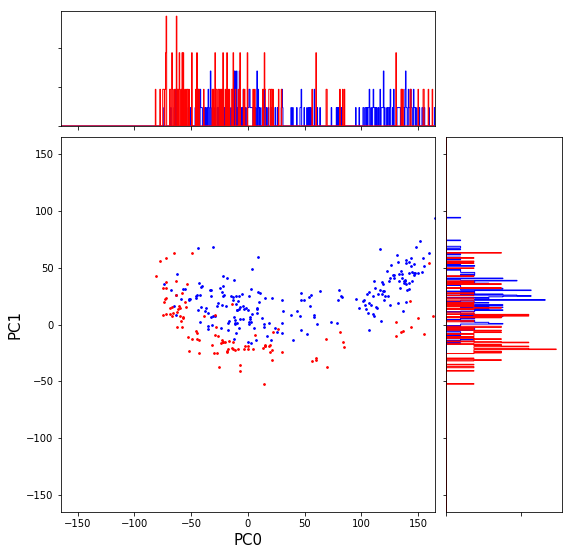

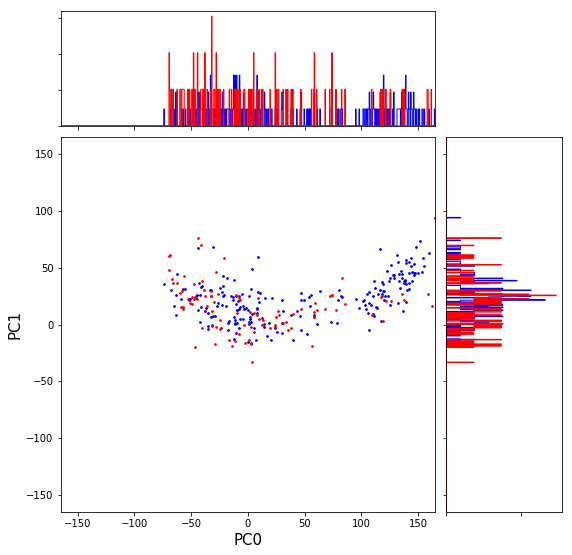

In [7]:
%matplotlib inline

rnaNet.scatter_hist()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def multiScatterHist(x1, x2, y1, y2, colors1, colors2, axis1='', axis2=''):
    nullfmt = NullFormatter()         # no labels
    
    # sanity check
    print("colors1 shape = " + str(colors1.shape) + " colors2 shape = " + str(colors2.shape))
    print("x1 shape = " + str(x1.shape) + " x2 shape = " + str(x2.shape))
    print("y1 shape = " + str(y1.shape) + " y2 shape = " + str(y2.shape))
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    
    # start with a rectangular Figure
    plt.figure(figsize=(12, 12))
       
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    # the scatter plot:
    axScatter.scatter(x1, x2, color=colors1, marker='o', s=20)
    axScatter.scatter(y1, y2, color=colors2, marker='s', facecolors='none', s=20) 


    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))
    
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x1, bins=bins, color = 'blue', normed=True, stacked = True, histtype='step' )
    axHisty.hist(x2, bins=bins, orientation='horizontal', color = 'blue', normed=True, 
                 stacked = True, histtype='step')
    axHistx.hist(y1, bins=bins, color = 'red', normed=True, stacked = True, histtype='step')
    axHisty.hist(y2, bins=bins, orientation='horizontal', color = 'red', normed=True, 
                 stacked = True, histtype='step')
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    axHistx.set_xticklabels([])
    axHistx.set_yticklabels([])
    axHisty.set_xticklabels([])
    axHisty.set_yticklabels([])
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)

    plt.show()